# ODEpy
### welcome to the ODEpy startup guide:
this package is optimized for integrating systems of ordinary differential equations using Euler's method. This notebook showcases the package's abilities

In [5]:
# import ODEpy functions
from ODEpy import *

## using the ODEpy function
this function integrates systems of ODEs given a model; many of which come with the ODEpy package. call the ODEhelp() function for a list of models to choose and instructions on creating custom models

In [6]:
ODEhelp()

current models: 
 - clifford_attractor 
 - lorenz_system 
 - damped_pendulum 
 - rossler_attractor 

to create a model: 
     model arguments should require initial conditions in x, y, and optionaly z dimensions; and constants.
     use this format when creating custom models

example 3D function with 3 constants: 
def model_name(X, Y, Z, constants):
    RHO, SIGMA, BETA = constants
    dx = SIGMA * (Y - X)
    dy = X * (RHO - Z) - Y
    dz = X * Y - BETA * Z
    return [dx, dy, dz]

example 2D function with 4 constants: 
def model_name(X, Y, constants):
    A, B, C, D = constants
    dx = np.sin(A*Y) + C*np.cos(A*X)
    dy = np.sin(B*X) + D*np.cos(B*Y)
    return [dx, dy]


before we can use ODEpy, we need to define constants for each model

In [7]:
# DEFINE CONSTANTS 
lorenz = (28., 10., 8./3.)
clifford = (2., 2., 1., -1.)
rossler = (.2, .2, 5.7)
pendulum = (.4, 10)

### Lorenz Attractor

In [8]:
X, Y, Z = ODEpy(lorenz_system, 1.,1.,1., lorenz, 500000, .001)

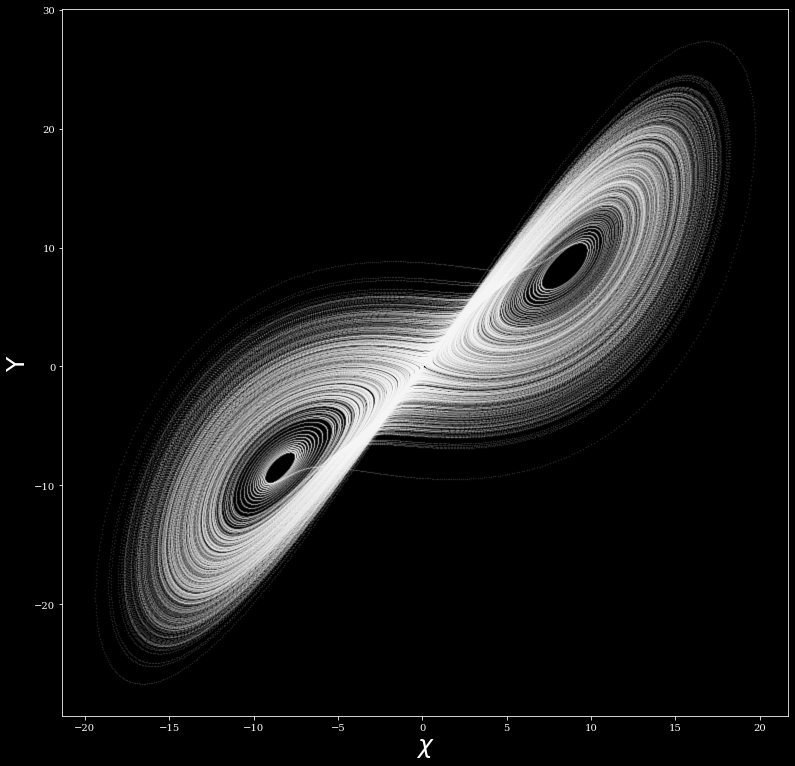

In [9]:
%matplotlib inline
ODEplot(X, Y, None, alpha = .1, size = .5)

### Rossler Attractor

In [25]:
X, Y, Z = ODEpy(rossler_attractor, .001,.001,.001, rossler, 200000, .001)

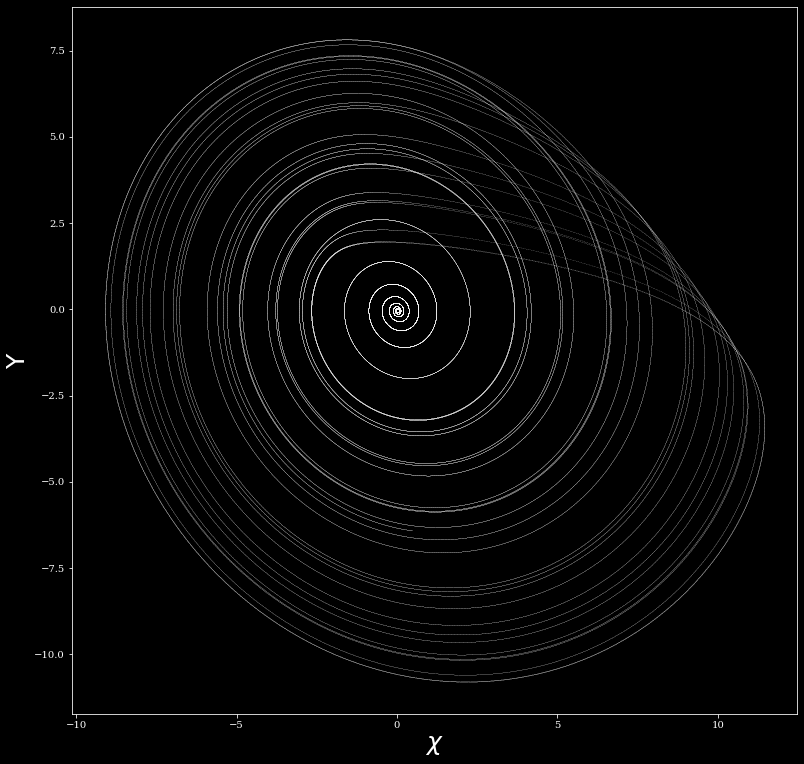

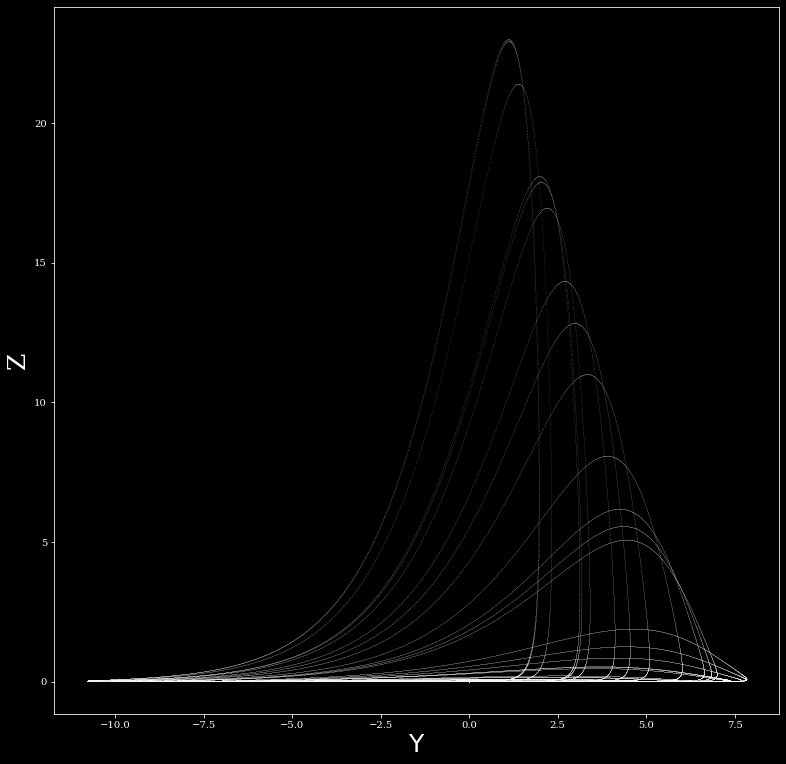

In [11]:
%matplotlib inline
# PLOT XY PLANE
ODEplot(X, Y, None, size = .001, alpha = 1, color = 'white')
# PLOT YZ PLANE
ODEplot(Y, Z, None, size = .001, alpha = 1, color = 'white', x_label = r'$\Upsilon$', y_label = 'Z')

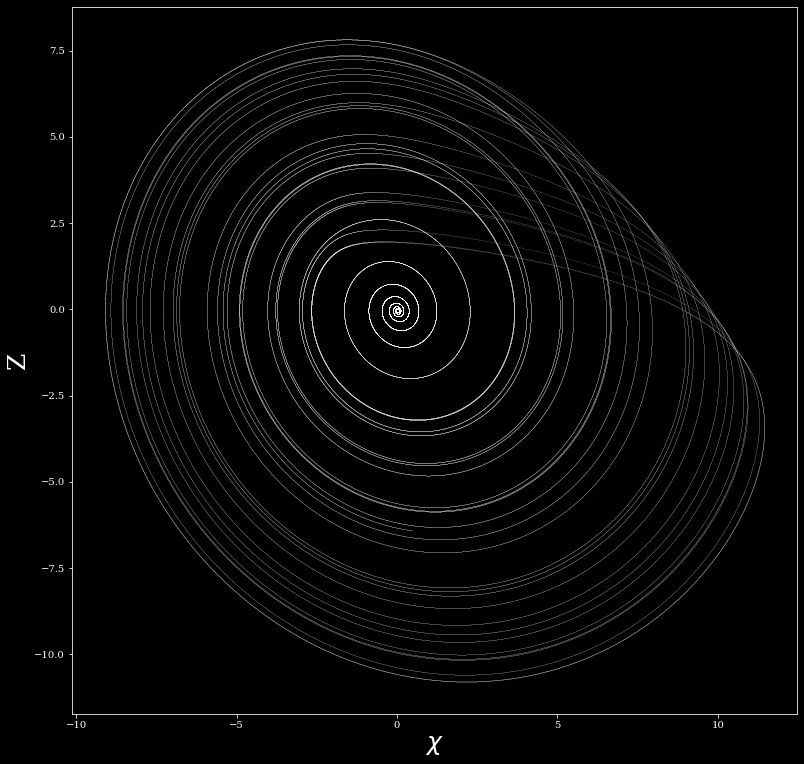

In [12]:
%matplotlib inline
# PLOT XZ PLANE
ODEplot(X, Y, None, size = .001, alpha = 1, color = 'white', x_label = r'$\chi$', y_label = 'Z')

## 3 dimensional plots:
to make a 3D plot, simply pass X, Y, Z arrays into ODEplot. you can change the camera altitude with 'elev' and azimuthal pan angle with 'azim.' play around with 'alpha,' 'size,' and 'color' for interesting looking plots. %matplotlib notebook allows for interactive notebook plots; drag mouse onto plot to shift perspective

<IPython.core.display.Javascript object>


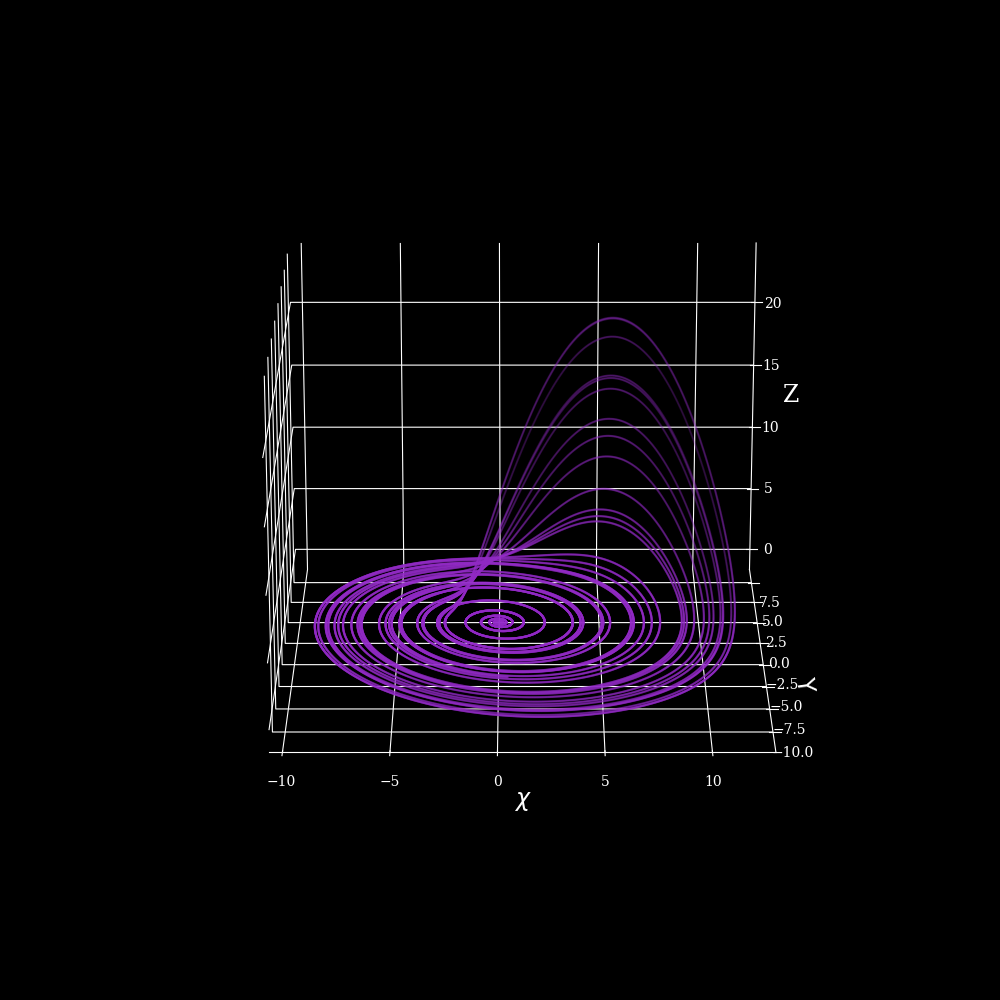

In [26]:
%matplotlib notebook
ODEplot(X, Y, Z, alpha = .1, size = .5, elev = 20, azim = -90, color = 'darkorchid')

## Damped Pendulum
#### changing the dt value will have a drastic effect on the system (the last value in the function below)

In [19]:
A, B = ODEpy(damped_pendulum, 1., 1., None, pendulum, 500000, .01)
C, D = ODEpy(damped_pendulum, 1., 1., None, pendulum, 500000, .03)
E, F = ODEpy(damped_pendulum, 1., 1., None, pendulum, 500000, .04)
G, H = ODEpy(damped_pendulum, 1., 1., None, pendulum, 500000, .041)

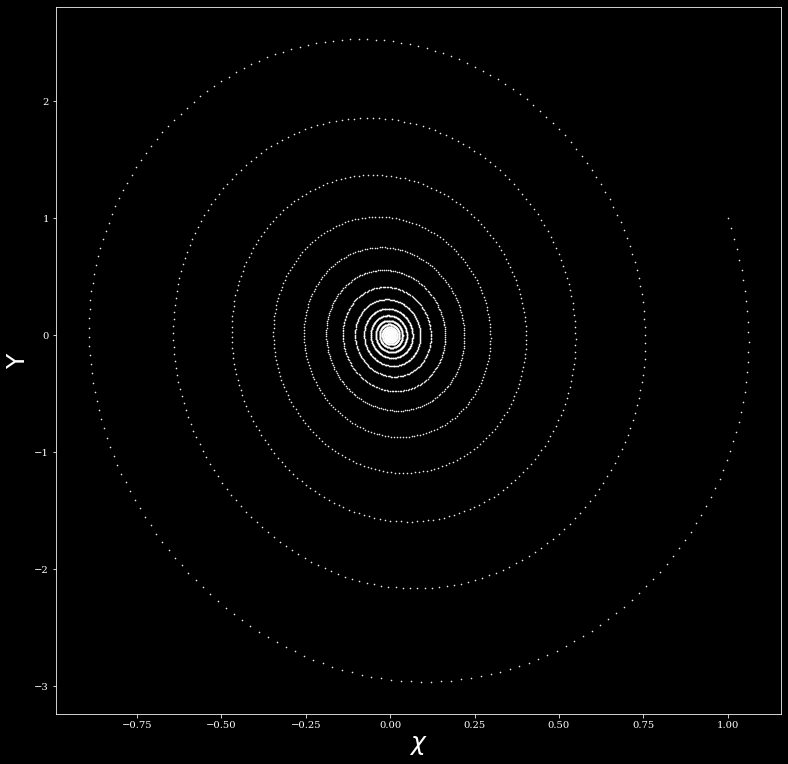

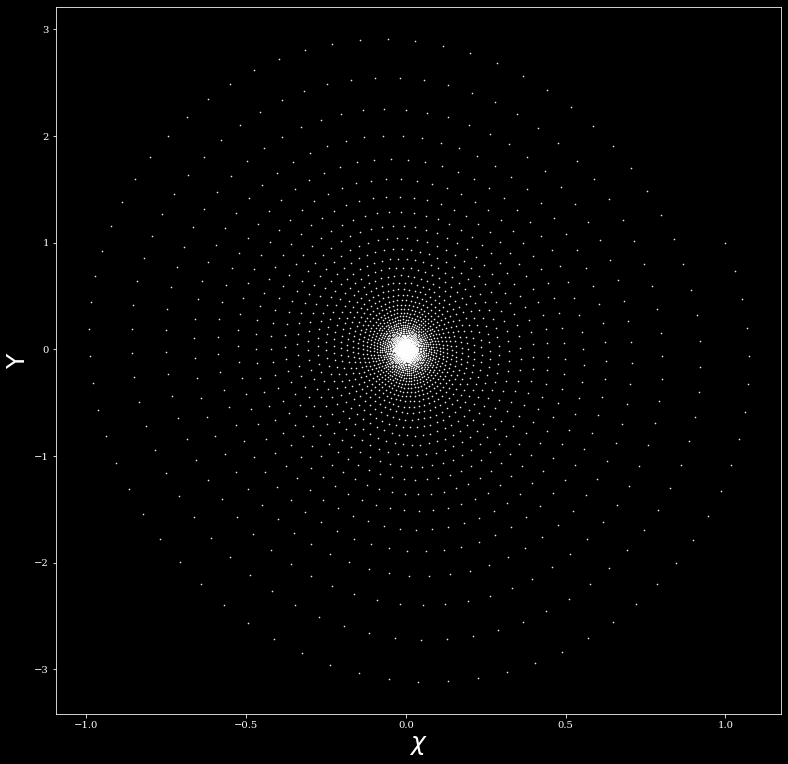

In [20]:
%matplotlib inline
ODEplot(A, B, None, alpha = 1)
ODEplot(C, D, None, alpha = 1)

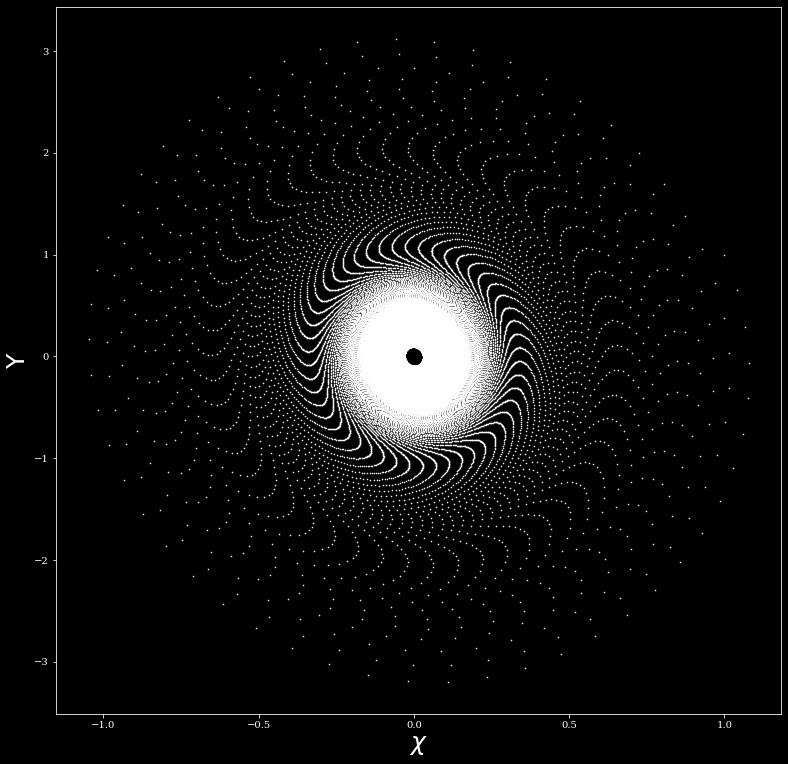

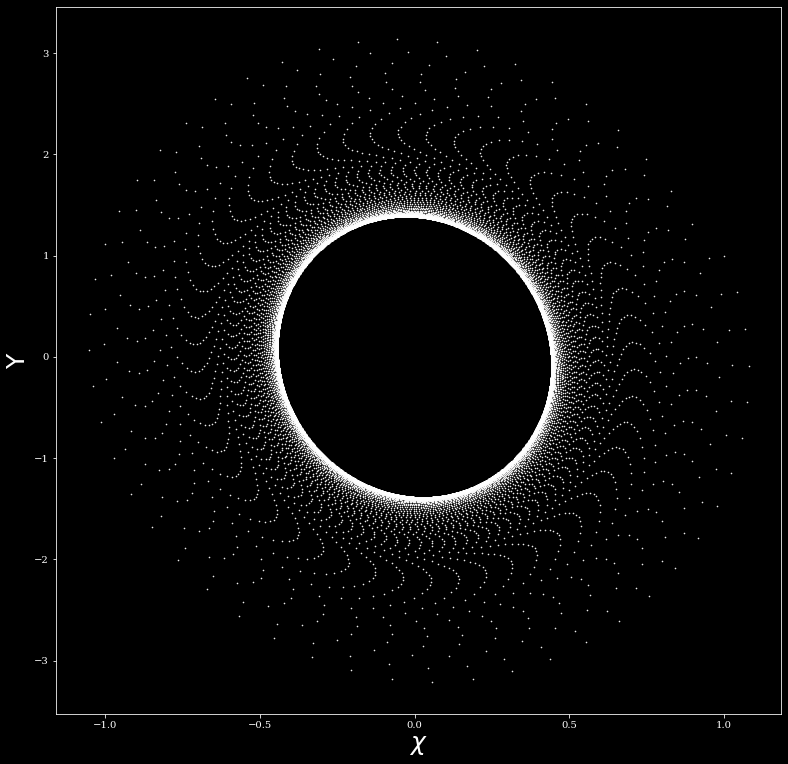

In [21]:
%matplotlib inline
ODEplot(E, F, None, alpha = 1)
ODEplot(G, H, None, alpha = 1)

## using the ODEattractor function
some of the models can be graphed using a slightly different method and will produce beatiful patterns. so far this function seems to work best for 2D systems. setting zinit to None (below) will produce a 2D graph

In [22]:
X, Y = ODEattractor(clifford_attractor, 1., 1., None, clifford, 500000)

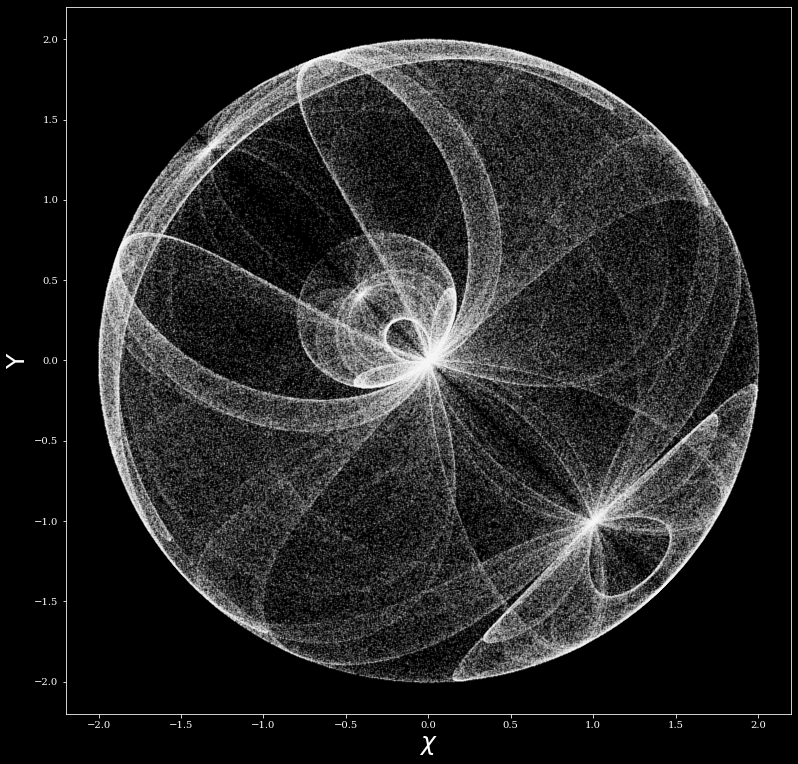

In [23]:
%matplotlib inline
ODEplot(X, Y, None, alpha = .1, size = .5, dpi = 75)

### 2D systems visualized in 3D space

In [3]:
X, Y, Z = ODEattractor(damped_pendulum, 1., 1., True, pendulum, 300000)

<IPython.core.display.Javascript object>


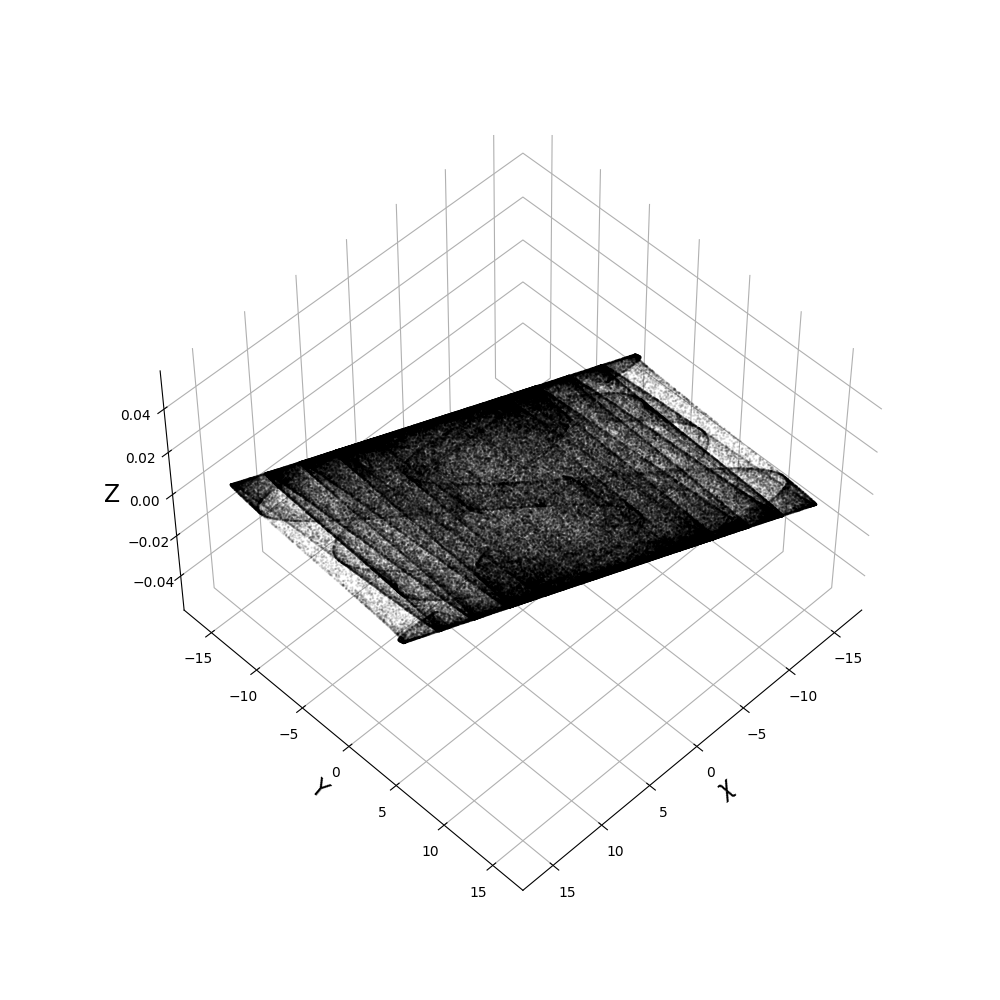

In [4]:
%matplotlib notebook
ODEplot(X, Y, Z, darkmode = False, alpha = .1, size = .5, dpi = 75, elev = 50)